In [ ]:
import pandas as pd
df=pd.read_csv('/content/cancer.csv')
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [ ]:
df.isna().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['diagnosis']=le.fit_transform(df['diagnosis'])

In [ ]:
df.dtypes

mean_radius        float64
mean_texture       float64
mean_perimeter     float64
mean_area          float64
mean_smoothness    float64
diagnosis            int64
dtype: object

In [ ]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=25)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
minm=MinMaxScaler()
minm.fit(X_train)
X_train=minm.transform(X_train)
X_test=minm.transform(X_test)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense

1)Creating artifical neural network using sequential


2)adding input layer Dense layer=Fully connected layer

ReLu is a non-linear activation function that is used in multi-layer neural networks or deep neural networks. This function can be represented as:

f(X)= x;x>=0
      0;x< 0

where x = an input value

 

According to equation 1, the output of ReLu is the maximum value between zero and the input value. An output is equal to zero when the input value is negative and the input value when the input is positive. Thus, we can rewrite equation 1 as follows:

 

where x = an input value

 
rectified linear uniit




In [ ]:
ann=tf.keras.models.Sequential()
from keras.layers.attention.multi_head_attention import activation
ann.add(Dense(units=5,activation='relu'))

adding first hidden layer

In [ ]:
ann.add(Dense(units=3,activation='relu'))

second hidden layer

In [ ]:
ann.add(Dense(units=2,activation='relu'))

output layer


in binary classification prblm sigmoid classification is used in the output layer 


1/(1+e^-x)

In [ ]:
ann.add(Dense(units=1,activation='sigmoid'))

optimizer is used to give optimizer

to calculate the loss


In [ ]:
ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

epochs is the number of time we train a sample 

batch_size= is the size of a batch of sample



In [ ]:
ann.fit(X_train,y_train,batch_size=32,epochs=100)

Epoch 1/100
13/13 [==============================] - 3s 7ms/step - loss: 0.6729 - accuracy: 0.6080
Epoch 2/100
13/13 [==============================] - 0s 9ms/step - loss: 0.6622 - accuracy: 0.6131
Epoch 3/100
13/13 [==============================] - 0s 11ms/step - loss: 0.6539 - accuracy: 0.6131
Epoch 4/100
13/13 [==============================] - 0s 7ms/step - loss: 0.6476 - accuracy: 0.6131
Epoch 5/100
13/13 [==============================] - 0s 4ms/step - loss: 0.6415 - accuracy: 0.6131
Epoch 6/100
13/13 [==============================] - 0s 4ms/step - loss: 0.6352 - accuracy: 0.6131
Epoch 7/100
13/13 [==============================] - 0s 7ms/step - loss: 0.6288 - accuracy: 0.6131
Epoch 8/100
13/13 [==============================] - 0s 4ms/step - loss: 0.6226 - accuracy: 0.6131
Epoch 9/100
13/13 [==============================] - 0s 5ms/step - loss: 0.6171 - accuracy: 0.6131
Epoch 10/100
13/13 [==============================] - 0s 4ms/step - loss: 0.6100 - accuracy: 0.6131
Epoch 11

In [ ]:
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 30        
                                                                 
 dense_1 (Dense)             (None, 3)                 18        
                                                                 
 dense_2 (Dense)             (None, 2)                 8         
                                                                 
 dense_3 (Dense)             (None, 1)                 3         
                                                                 
Total params: 59
Trainable params: 59
Non-trainable params: 0
_________________________________________________________________


In [ ]:
y_pred=ann.predict(X_test)
y_pred=(y_pred>0.5)
y_pred

6/6 [==============================] - 0s 4ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [

In [ ]:
y_test

522    1
120    1
241    1
362    1
221    1
      ..
270    1
544    1
312    1
325    1
63     1
Name: diagnosis, Length: 171, dtype: int64

              precision    recall  f1-score   support

           0       0.96      0.88      0.92        58
           1       0.94      0.98      0.96       113

    accuracy                           0.95       171
   macro avg       0.95      0.93      0.94       171
weighted avg       0.95      0.95      0.95       171



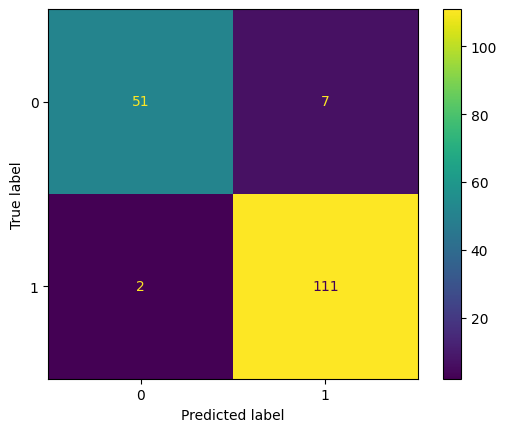

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay,classification_report
print(classification_report(y_test,y_pred))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))